In [1]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
dataset = pd.read_csv('Downloads\MagicTelescope-1.csv')
en = preprocessing.LabelEncoder()
en.fit(['h','g'])
dataset.loc[:,'class'] = en.transform(dataset['class'])
dataset.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [2]:
label = dataset['class']
div = dataset.drop('class', axis = 'columns') 

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(div, label, test_size=0.2, random_state=0)

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model = make_pipeline(StandardScaler(), LogisticRegression())

In [5]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

model.score(X_test, y_test)

In [6]:
print('Accuracy score: ',model.score(X_test, y_test))
y_pred = model.predict(X_test)

Accuracy score:  0.788906414300736


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      2457
           1       0.77      0.58      0.66      1347

    accuracy                           0.79      3804
   macro avg       0.78      0.74      0.75      3804
weighted avg       0.79      0.79      0.78      3804



<AxesSubplot:>

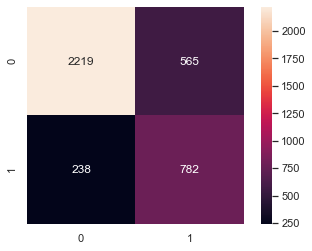

In [8]:
from sklearn.metrics import confusion_matrix , roc_curve, auc
co = confusion_matrix(y_test, y_pred)
import seaborn as sns; sns.set()
sns.heatmap(co.T, square=True, annot=True, fmt='d', cbar=True)

ROC 0.7418416360509902


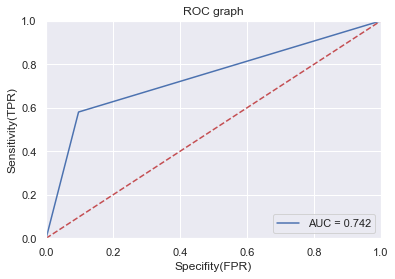

In [9]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc = auc(false_positive_rate, true_positive_rate)
print('ROC',roc)
plt.title('ROC graph')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.3f' %roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Sensitivity(TPR)')
plt.xlabel('Specifity(FPR)')
plt.show()

In [10]:
TP = co[0][0]
FP = co[0][1]
FN = co[1][0]
TN = co[1][1]
FP = FP.astype(float)
TP = TP.astype(float)
FN = FN.astype(float)
TN = TN.astype(float)

In [11]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print("TPR" ,TPR)
print("FPR" ,FPR)

TPR 0.7970545977011494
FPR 0.23333333333333334
